In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Question 2

In [2]:
def sigmoid_f(z):
    exp = np.exp(-z)
    return 1/(1+exp)

#given an obs and weights
#returns the probability of P(y=1)
# with n = number of features
#   weight matrix is nx1 shape
#   and that X is r x n
def hypothesis(X, W,bias):
    # cast to np.array to ensure functions, get T
    X = np.matrix(X).T
    W = np.matrix(W).T

    # eval Z matrix from weights
    Z = np.dot(W,X) + bias #output shape 1 x obs
    Z = Z.tolist()[0] #cast to simple list

    Z = [sigmoid_f(z) for z in Z]
    return Z

#prediction
def classifier_f(X, W,bias):
    Z = hypothesis(X, W, bias)

    #0.5 breakpoint
    def logit_threshold(z):
        if(z >= 0.5):
            return 1
        else:
            return 0
            
    Z = [logit_threshold(z) for z in Z]
    return Z


In [ ]:
#assume Y is a flat (1xn) list, 2 class
# returns Cross Entropy val
def binary_loss_f(hypo, y):
    hypo = np.matrix(hypo)  # hypothesis
    y = np.matrix(y).T

    val = np.sum(np.dot(np.log(hypo), y) +
                 np.dot(np.log(1-hypo), 1-y))

    return (-1/len(y))*val


In [13]:
#Gradient calculator
def gradient_f(X,W,b,y):
    # n*1 shape
    error = hypothesis(X, W, b)-y

    grad_W = X.T.dot(error) / len(y)
    grad_W = np.reshape(grad_W, (-1, 1))
    grad_intercept = np.sum(error)/len(y)

    return grad_W, grad_intercept


In [19]:
#GRADIENT DESCENT
def optimizer_f(max_iter, alpha,X,y):
    #init
    W = np.zeros((X.shape[1], 1))
    max_iter = max_iter
    alpha = alpha
    b = 0
    cost = None

    #select best mechanism
    best_W = W.copy()
    best_b = 0
    best_cost = binary_loss_f(hypothesis(
        X, W, b), y)
    hist_cost = []

    for i in range(max_iter):
        grads = gradient_f(X,W,b,y)
        grad_W = grads[0]
        grad_intercept = grads[1]

        #updating 
        W = W - alpha*grad_W
        b = b - alpha*grad_intercept

        #select best mechanism
        this_cost = binary_loss_f(hypothesis(
            X, W, b), y)

        #store best params
        hist_cost.append(this_cost)
        if(this_cost < best_cost):
            best_cost = this_cost
            best_W = W.copy()
            best_b = b

    W = best_W
    cost = best_cost

    return report(W,b,y, hist_cost,cost)

def report(W,b,y, hist_cost,cost):
    #report coef
    print("Weights:")
    print(W.T)
    print("y intercept:")
    print(b)

    print("cost:")
    print(cost)
    error = classifier_f(X, W, b)-Y
    print("accuracy:")
    print(1-(sum(error)/len(error)))

    # show plot
    plt.plot(hist_cost)
    plt.ylabel("score")
    plt.xlabel("iteration")

    return W,b


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

#get data
data = load_breast_cancer()
Y = data.target # this is 0-1 binary, cannot normalize further
X = data.data

scaler = MinMaxScaler()
X = scaler.fit_transform(X) # normalize X

Weights:
[[-1.1434992  -1.30912899 -1.24649986 -1.57207726  0.4750165  -0.71928016
  -2.48155437 -3.34113606  0.41115119  2.03552652 -1.64607791  0.46426397
  -1.29014345 -1.22181241  0.5989249   0.91627859  0.51280409  0.27778245
   0.7602846   0.93372269 -2.3582086  -2.14580201 -2.21834932 -2.15158438
  -0.98440036 -1.12134051 -1.78357458 -3.27399809 -1.05564681 -0.1960431 ]]
y intercept:
7.596854589203278
cost:
0.12354588987961958
accuracy:
0.9824253075571178


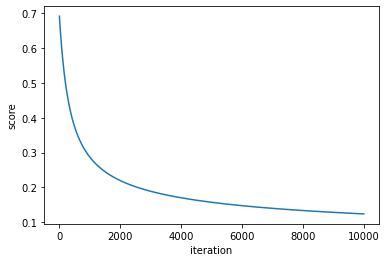

In [20]:
output = optimizer_f(10000,0.05,X,Y) #10k iter, 0.05 learning rate

In [ ]:
#getting results
weights = output[0].tolist()

dict = {}
for i in range(len(weights)):
    dict[data.feature_names[i]] = weights[i]

output[1]

#'0 = malignant' and '1 = benign'.
Ranked Weights:

'mean fractal dimension': [2.0355265220523395],
'fractal dimension error': [0.9337226886084741],
'compactness error': [0.9162785853132651],
'symmetry error': [0.7602846015281611],
'smoothness error': [0.5989248972791296],
'concavity error': [0.5128040934311626],
'mean smoothness': [0.4750165032045297],
'texture error': [0.4642639706439808],
'mean symmetry': [0.41115119203402106],
'concave points error': [0.2777824500100443],
'worst fractal dimension': [-0.19604310332841782]
'mean compactness': [-0.7192801606347963],
'worst smoothness': [-0.9844003629135498],
'worst symmetry': [-1.055646806870359],
'worst compactness': [-1.1213405129065281],
'area error': [-1.2218124071745537],
'mean perimeter': [-1.2464998617198304],
'perimeter error': [-1.2901434487276633],
'mean texture': [-1.3091289907027561],
'mean radius': [-1.1434992003641462],
'mean area': [-1.5720772561423688],
'radius error': [-1.6460779103249297],
'worst concavity': [-1.783574582148665],
'worst texture': [-2.145802008304591],
'worst area': [-2.151584376781528],
'worst perimeter': [-2.2183493181500524],
'worst radius': [-2.358208604270848],
'mean concavity': [-2.4815543695584337],
'mean concave points': [-3.3411360559613303],
'worst concave points': [-3.2739980898775736],

All positive (indication for benign) variables are errors of different measurement except mean fractal dimension and mean symmetry. Mean fractal dimension also has the most significant positive coefficient, but we cannot infer much from this as there are many more variables with similarly significant but negative coefficients. 

The error measurements generally have weak (less than 1.0) coefficients and are consequently less significant to the classification. Mean or worst concavity have the most negative coefficients, followed by many of the “worst” measurements whose coefficients are relatively strong too.


### Question 3

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import random
random.seed(265)


In [62]:
def TrainTest_split_CV(X,y,model,train_percent):
    #random index
    index = list(range(0, len(y)))
    random.shuffle(index)

    train_index = index[:int(len(y)*train_percent)]
    test_index = index[int(len(y)*train_percent):]

    #splitting dataset
    train_X = np.take(X,train_index,0) #axis = 0, row-wise
    train_y = np.take(y,train_index,0) #axis = 0, row-wise
    test_X = np.take(X, test_index, 0) #axis = 0, row-wise
    test_y = np.take(y, test_index, 0)  # axis = 0, row-wise

    #running regression
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)

    return mean_squared_error(test_y, prediction)


In [223]:
def KFold_CV(X, y, model, k):
    #random index
    index = list(range(0, len(y)))
    random.shuffle(index)

    folds_p = np.arange(0.0,1.0, 1.0/k)
    folds_p = np.append(folds_p, 1.0)
    folds_p = np.delete(folds_p, 0)

    folds_costs = []
    for i in range(len(folds_p)):
        start = int(len(index)*(folds_p[i]-folds_p[0]))
        end = int(len(index)*(folds_p[i]))

        test_index = index[start:end]
        train_index = index[end:]
        b = index[:start]
        for ind in b: train_index.append(ind)
         
        #splitting dataset
        train_X = np.take(X, train_index, 0)  # axis = 0, row-wise
        train_y = np.take(y, train_index, 0)  # axis = 0, row-wise
        test_X = np.take(X, test_index, 0)  # axis = 0, row-wise
        test_y = np.take(y, test_index, 0)  # axis = 0, row-wise

        #running regression
        model.fit(train_X, train_y)
        prediction = model.predict(test_X)

        folds_costs.append(mean_squared_error(test_y, prediction))


    return sum(folds_costs)/len(folds_costs)  # avg cost


In [227]:
def LOOCV(X, y, model):
    #random index
    k = len(y)
    index = list(range(0, len(y)))
    random.shuffle(index)

    folds_costs = []
    for i in range(len(index)):
        this_index = index.copy()

        test_index = this_index.pop(i)
        train_index = this_index

        #splitting dataset
        train_X = np.take(X, train_index, 0)  # axis = 0, row-wise
        train_y = np.take(y, train_index, 0)  # axis = 0, row-wise
        test_X = np.take(X, test_index, 0)  # axis = 0, row-wise
        test_y = np.take(y, test_index, 0)  # axis = 0, row-wise

        #running regression
        model.fit(train_X, train_y)
        prediction = model.predict([test_X, test_X])[0]

        folds_costs.append(mean_squared_error(test_y, prediction))

    return sum(folds_costs)/len(folds_costs)  # avg cost


In [37]:
from sklearn.datasets import fetch_california_housing

#load and separate data
calif = fetch_california_housing(as_frame=True)
scaler = MinMaxScaler()

data = scaler.fit_transform(calif.frame)  # normalizing

X = data[:, 0:8]
Y = data[:, [8]]


In [228]:
model = LinearRegression()
print("Train_test split 70% MSE: ", TrainTest_split_CV(X,Y,model,0.7))
print("5Fold MSE: ", KFold_CV(X, Y, model, 5))
print("LOOCV MSE: ", LOOCV(X, Y, model))


Train_test split 70% MSE:  0.0225709576136961
5Fold MSE:  0.02242545356188667
LOOCV MSE:  0.022456875235560322


All three techniques produces results with very similar, very low error: a very good performance. The low error suggests the model (linear regression) is not overfitting and has a similar level of complexity to the real world. 

Typically, we expect the model to perform worse when it has less training data. The difference of error in our case is very marginal. This shows that the model used here is adequate since the information lost from using only 70% of the data for training is very close to that of LOOCV which uses all but one observation for training. 

Granted, comparing performance in such a way is possible as the data set is simple (only 8 variables) and has a relatively large number of observations (20640 observations).
